In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import keras

from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# read dataset from csv file
train=pd.read_csv('mitbih_train.csv')
test=pd.read_csv('mitbih_test.csv')

In [3]:
# preprocessing data
train_np = np.array(train)
test_np = np.array(test)
X_train = train_np[0:87553,0:187]
y_train = train_np[0:87553,187]
X_test = test_np[0:21891,0:187]
y_test = test_np[0:21891,187]
NB_CLASSES = 5
NB_FEATURES = X_train.shape[1]

Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [4]:
# creating model
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(NB_CLASSES,input_shape=(NB_FEATURES,1),activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5)                 35        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [5]:
# train model with adam optimizer and crossentropy loss function
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
trained_model = model.fit(x=X_train,y = Y_train,validation_data=(X_test,Y_test),epochs=20)

Epoch 1/20
2737/2737 [==============================] - 71s 26ms/step - loss: 0.8338 - accuracy: 0.7972 - val_loss: 0.6598 - val_accuracy: 0.8276
Epoch 2/20
2737/2737 [==============================] - 70s 26ms/step - loss: 0.6554 - accuracy: 0.8277 - val_loss: 0.6544 - val_accuracy: 0.8276
Epoch 3/20
2737/2737 [==============================] - 58s 21ms/step - loss: 0.6531 - accuracy: 0.8277 - val_loss: 0.6530 - val_accuracy: 0.8276
Epoch 4/20
2737/2737 [==============================] - 50s 18ms/step - loss: 0.6515 - accuracy: 0.8277 - val_loss: 0.6517 - val_accuracy: 0.8277
Epoch 5/20
2737/2737 [==============================] - 50s 18ms/step - loss: 0.6500 - accuracy: 0.8277 - val_loss: 0.6508 - val_accuracy: 0.8277
Epoch 6/20
2737/2737 [==============================] - 50s 18ms/step - loss: 0.6490 - accuracy: 0.8280 - val_loss: 0.6504 - val_accuracy: 0.8282
Epoch 7/20
2737/2737 [==============================] - 50s 18ms/step - loss: 0.6485 - accuracy: 0.8285 - val_loss: 0.6504 -

In [8]:
# show accuracy of model
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1])

685/685 [==============================] - 4s 6ms/step - loss: 0.6501 - accuracy: 0.8284
Test accuracy: 0.8284226655960083


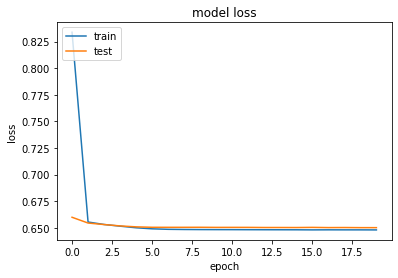

In [6]:
# learning curve and generalization curve
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()